In [90]:
import pandas as pd
from matplotlib import pyplot as plt

In [91]:
df = pd.read_csv('largest-impact-craters.csv').sort_values('crater_diameter')
df.head()

,Entity,Code,Year,crater_diameter
9,Mjølnir (Norway),NaN,-142000000,40
14,Saint Martin (Canada),NaN,-220000000,40
13,Puchezh-Katunki (Russia),NaN,-167000000,40
4,Chesapeake Bay (United States),NaN,-35500000,40
19,Woodleigh (Australia),NaN,-364000000,40


<Figure size 640x480 with 0 Axes>

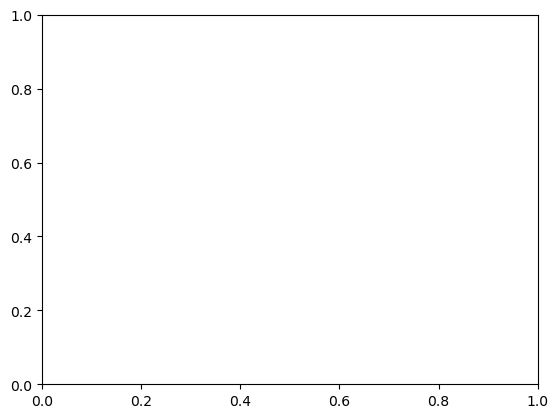

In [92]:
plt.clf()
fig = plt.figure()
ax = plt.axes()

In [93]:
# set up custom tick marks
ax.yaxis.set_tick_params(left=False, right=False, reset=True)
ax.xaxis.set_tick_params(bottom=False)
ticks = [0, 40, 60, 80, 120, 140, 160]
ax.set_xticks(ticks, labels=[f'{num}km' for num in ticks])
labels = ax.get_xticklabels()
labels[-2] = '' # remove the 140 label
ax.set_xticklabels(labels, color='dimgray')
ax.spines['left'].set_visible(True)
for spine in ('top', 'right', 'bottom'):
    ax.spines[spine].set_visible(False)
ax.grid(axis='x', linestyle='--', zorder=0, alpha=0.5)

In [94]:
# plot the main bar data
bars = ax.barh([i for i in range(len(df))], df['crater_diameter'], tick_label=df['Entity'], zorder=10, alpha=0.9, color='steelblue')

In [95]:
# set up custom y axis
ax.spines['left'].set_bounds(-1, bars[-1].get_y() + bars[-1].get_height())
ax.spines['left'].set_zorder(20)
ax.set_ylim(-1, bars[-1].get_y() + bars[-1].get_height())

(-1.0, 19.400000000000002)

In [96]:
# write annotation after each bar, first km and then year
padding = 1
for i, bar in enumerate(bars):
    fig.text(x=bar.get_width() + padding, 
             y=bar.get_y() + bar.get_height() / 2, 
             s=f'{bar.get_width()} km', transform=ax.transData, 
             va='center', fontsize=8.5
             )
    # if the number in the first part of the annotation is 3 digits, push the second part back more
    second_text_padding = 17 if bar.get_width() >= 100 else 14.5
    
    fig.text(x=bar.get_width() + padding + second_text_padding, 
             y=bar.get_y() + bar.get_height() / 2, 
             s=f'in {abs(df["Year"].iloc[i]):,} BCE', transform=ax.transData, 
             va='center', fontsize=8.5, color='gray'
             )

The code in the cell below is used for aligning the main title with the left end of the y-axis labels. It was adapted to fit this project from this Stack Overflow post: https://stackoverflow.com/questions/62997001/matplotlib-how-to-exact-align-the-title-to-the-y-label

In [97]:
bbox = ax.get_yticklabels()[-1].get_window_extent()
x,_ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
ax.set_title('Largest confirmed impact craters on Earth by diameter', ha='left', x=x, pad=20, fontdict={'family': 'serif', 'size':18}, color='dimgray')


Text(-0.35301859318996415, 1.0, 'Largest confirmed impact craters on Earth by diameter')

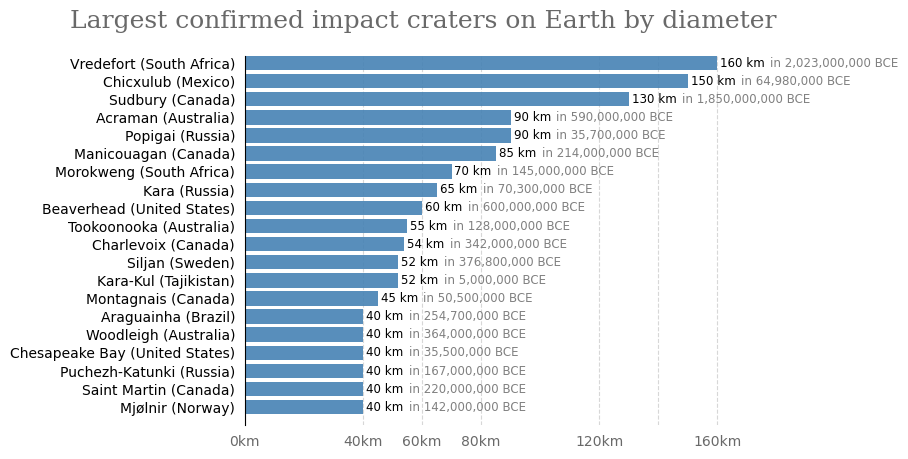

In [98]:
fig